## How to select the top documents in semantic retrieval??

- Cosine similarity
- TopN -- N??
- Candidate pool

In [1]:
import pandas as pd
import os
import string
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Manual threshold analysis

- Cut-off threshold =  (Max similarity X Threshold multiplier)
- only 5 queries
- only 10 thresholds


In [2]:
thresholds = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5]

query_1 = [2, 9, 21, 41, 76, 97, 100, 100, 100, 100] # _Big Data, KI für Analyse
query_2 = [1, 2, 3, 6, 16, 36, 77, 97, 100, 100] # _Wellenformen und -ausbreitung

query_3 = [2, 4, 5, 8, 26, 81, 99, 100, 100, 100] # _Resiliente Kommunikationsverbünde
query_4 = [2, 5, 12, 26, 79, 100, 100, 100, 100, 100] # _Wetterdatenfusion
query_5 = [1, 4, 13, 35, 82, 99, 100, 100, 100, 100] # _Taktische Datenlinks

data_list = []
for idx in range(len(thresholds)):
    data_list.append((thresholds[idx], query_1[idx], query_2[idx], query_3[idx], query_4[idx], query_5[idx]))

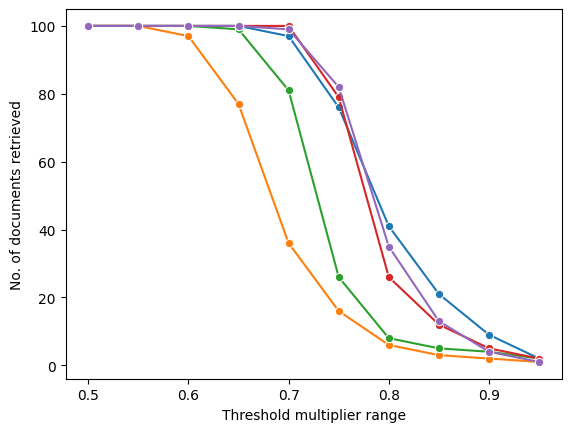

In [3]:
threshold_df = pd.DataFrame(data_list, columns=['Threshold multiplier', 'Query 1', 'Query 2', 'Query 3', 'Query 4', 'Query 5'])
plt.ylabel('No. of documents retrieved')
plt.xlabel('Threshold multiplier range')

for idx in range(1, 6):    
    sns.lineplot(data=threshold_df, x="Threshold multiplier", y=f"Query {idx}", marker="o")

# 2. Query threshold analysis

- 79 queries
- 50 threshold points

In [4]:
def read_document_data(filepath):

    try:
        with open(filepath, 'r') as f:
            data_dict = json.load(f)
    except Exception as e:
        data_dict = dict()
        print(e)

    return data_dict

In [5]:
document_cnt_data = []
target_queries = ['Schlüsselwörter', 'Schutz von unbemannten Systemen', 'Waffen Systeme', 'Defense', 'militärische Entscheidungsfindung', 'unbemannte Wirksysteme', 'Data Centric Warfare', 'Militärische Kommunikation', 'Unbemannte Landsysteme', 'Cyber Attack', 'Kryptologie', 'Quantentechnologie', 'Satellitenkommunikation', 'Big Data, KI für Analyse', 'IT-Standards', 'Edge computing', 'Mixed Reality', 'Architekturanalyse', 'Kommunikationsnetze', 'Methode Architektur', 'Robotik', 'Visualisierung', 'Wellenformen und -ausbreitung']

for file in os.listdir('document_count_results_index'):
    document_cnt_data.append(read_document_data(os.getcwd()+'/document_count_results_index/'+file))

In [6]:
doc_df = pd.DataFrame(document_cnt_data)
query_list = doc_df.Query.values 

# drop_query_names = list(set(query_list) - set(target_queries)) 
# doc_df = doc_df[doc_df['Query'].isin(target_queries)]

query_len = len(doc_df.index)

doc_df = doc_df.drop(columns=['Query'], axis=1)
threshold_doc_df = doc_df.T

columns = []
for idx in range(1, query_len+1):
    columns.append(f'Query {idx}')

threshold_doc_df.columns = columns
threshold_doc_df['Threshold multiplier'] = threshold_doc_df.index
threshold_doc_df['average'] = threshold_doc_df.mean(axis=1)
# threshold_doc_df

<AxesSubplot:xlabel='Threshold multiplier range', ylabel='No. of documents retrieved'>

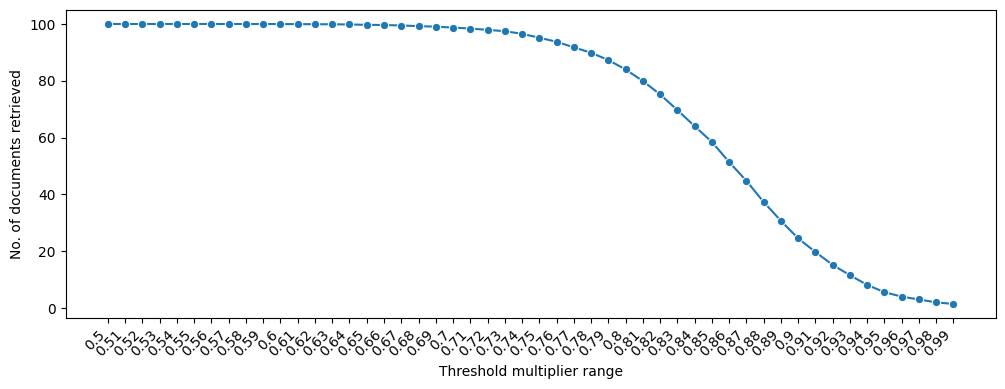

In [7]:
plt.figure(figsize=(12,4)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
)
plt.ylabel('No. of documents retrieved')
plt.xlabel('Threshold multiplier range')

sns.lineplot(data=threshold_doc_df, x="Threshold multiplier", y=f"average", marker="o")

# 3. Positive document threshold analysis

- 17 queries
- Only positive documents
- Max similarity
- Min similarity
- Diff between Max and Min similarities
- Mean similarities

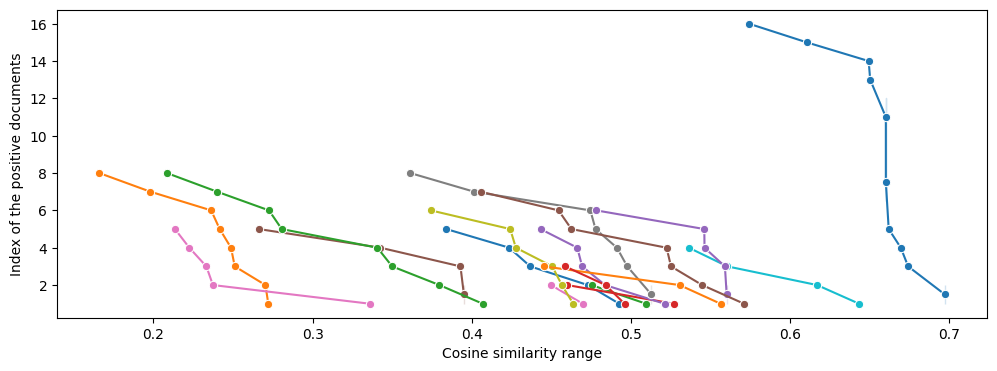

In [11]:
query_dataframe_folderpath = os.getcwd()+'/../dataframes/query_dataframes/'
plt.figure(figsize=(12,4)) 
min_sim_list = []
max_sim_list = []
mean_sim_list = []
diff_sim_list = []

plt.ylabel('Index of the positive documents')
plt.xlabel('Cosine similarity range')

for query_df_filename in os.listdir(query_dataframe_folderpath):
    query_df = pd.read_pickle(query_dataframe_folderpath+query_df_filename)
    max_df = query_df[query_df['query_sim'] == max(query_df.query_sim.values)]
    pos_df = query_df[query_df['label'].isin([1])]
    
    if len(pos_df.query_sim) > 0:
        
        pos_df = pd.concat([max_df, pos_df])
        
        idx += 1
        
        min_sim = round(min(pos_df.query_sim), 2)
        max_sim = round(max(pos_df.query_sim), 2)
        mean_sim = round(sum(pos_df.query_sim)/len(pos_df.query_sim), 2)
        diff_sim = round(max_sim-min_sim, 2)
        
        min_sim_list.append(min_sim)
        max_sim_list.append(max_sim)
        mean_sim_list.append(mean_sim)
        diff_sim_list.append(diff_sim)
        
        pos_df['positive document index'] = list(range(1, len(pos_df.index)+1))
        sns.lineplot(data=pos_df, x="query_sim", y="positive document index", marker="o")  
        
plt.savefig(os.getcwd()+'/../sqlite_db/clustering_results/candidate_pool_analysis.png',bbox_inches='tight')
plt.show()


[2.3, 4.5]

In [9]:
sim_list = []
for idx in range(len(max_sim_list)):
    sim_list.append((max_sim_list[idx], min_sim_list[idx], mean_sim_list[idx], diff_sim_list[idx]))

,max,min,mean,diff,max_min_ratio
0,0.49,0.38,0.44,0.11,0.78
1,0.27,0.17,0.24,0.10,0.63
2,0.51,0.48,0.49,0.03,0.94
3,0.53,0.46,0.49,0.07,0.87
4,0.52,0.44,0.48,0.08,0.85
5,0.40,0.27,0.36,0.13,0.68
6,0.47,0.45,0.46,0.02,0.96
7,0.51,0.36,0.47,0.15,0.71
8,0.46,0.37,0.43,0.09,0.80
9,0.64,0.54,0.59,0.10,0.84


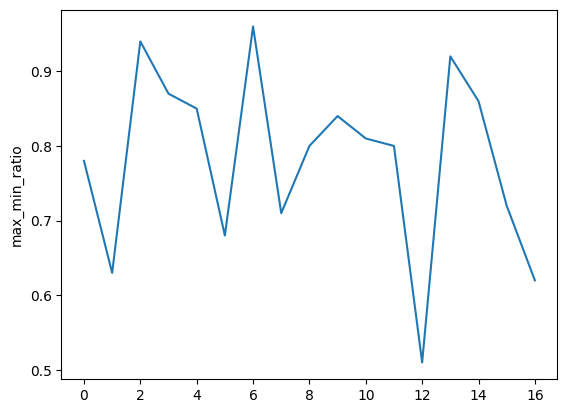

In [16]:
sim_df = pd.DataFrame(sim_list, columns=['max', 'min', 'mean', 'diff'])
sim_df['max_min_ratio'] = sim_df.apply(lambda x:round(x['min']/x['max'], 2),axis=1)
sns.lineplot(data=sim_df['max_min_ratio'])
sim_df

In [17]:
sim_df['max_min_ratio'].mean() # _0.75 vs - 0.2 -- count of semantic pool

0.7823529411764705

In [11]:
# sns.displot(diff_sim_list, binwidth=0.005)
# max(diff_sim_list)

In [86]:
sum(diff_sim_list)/len(diff_sim_list)

0.07764705882352942

In [46]:
avg_precision_data = []
filepath = os.getcwd()+'/../dataframes/average_precision_query/IR1/'

for file in os.listdir(filepath):
    avg_precision_data.append(read_document_data(filepath+file))

Query: ===========  Architekturanalyse  ============


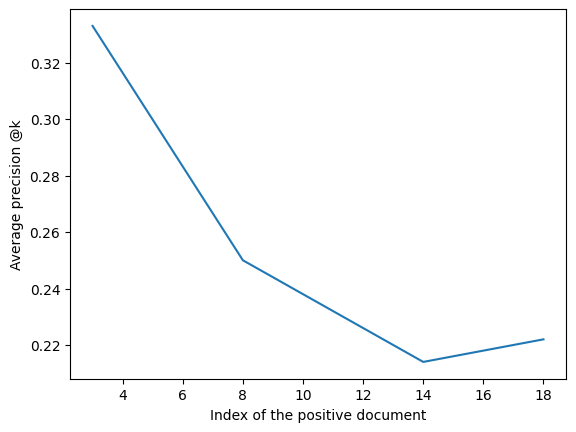

Query: ===========  Big Data, KI für Analyse  ============


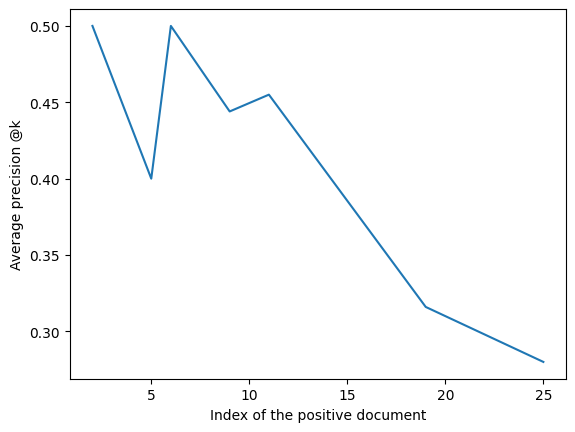

Query: ===========  Kommunikationsnetze  ============


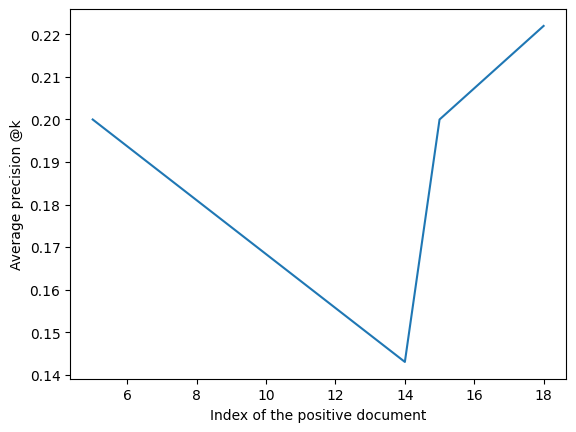

Query: ===========  Methode Architektur  ============


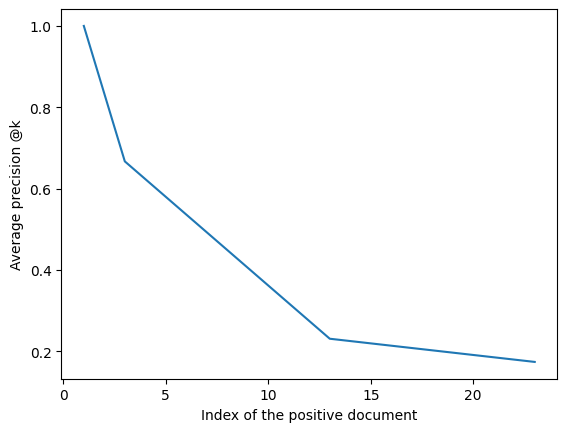

Query: ===========  Militärische Kommunikation  ============


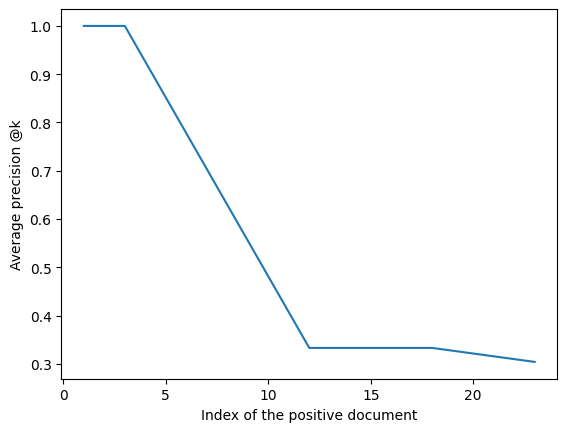

Query: ===========  Mixed Reality  ============


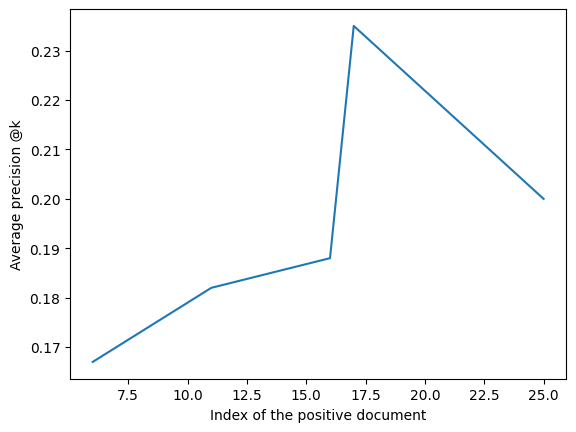

Query: ===========  Quantentechnologie  ============


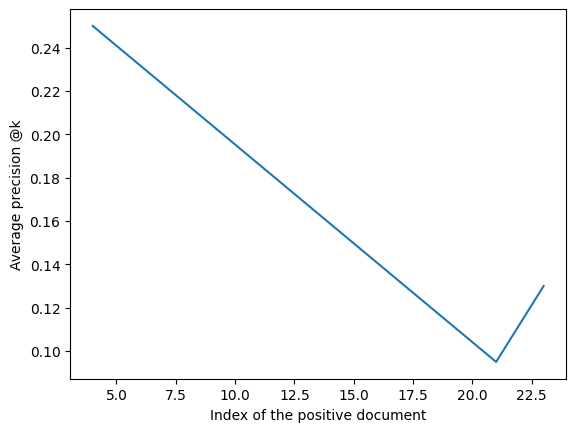

Query: ===========  Robotik  ============


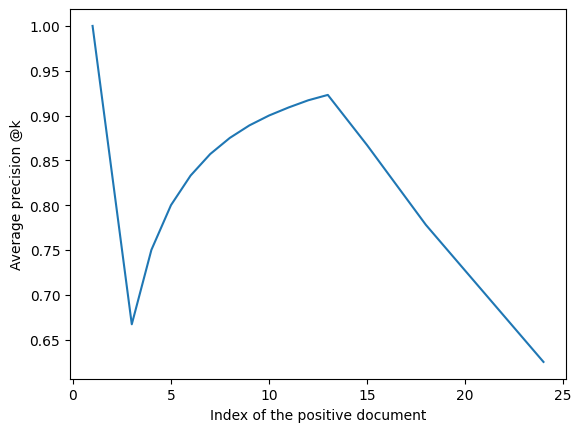

Query: ===========  Satellitenkommunikation  ============


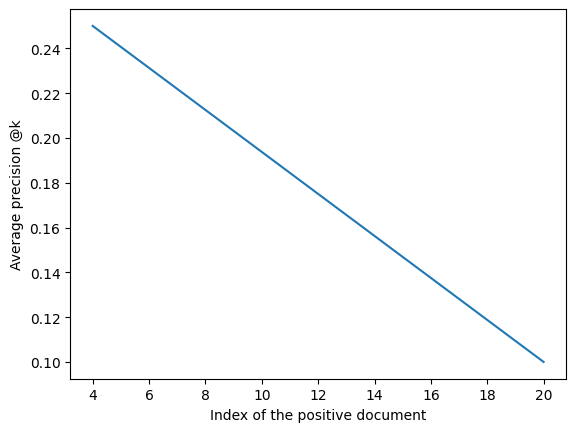

Query: ===========  Schutz von unbemannten Systemen  ============


Query: ===========  unbemannte Landsysteme  ============


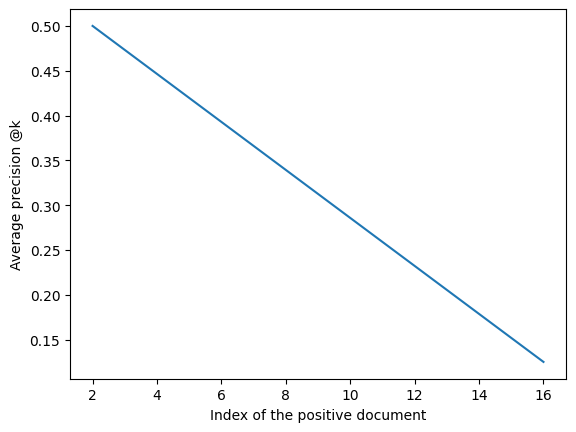

Query: ===========  Visualisierung  ============


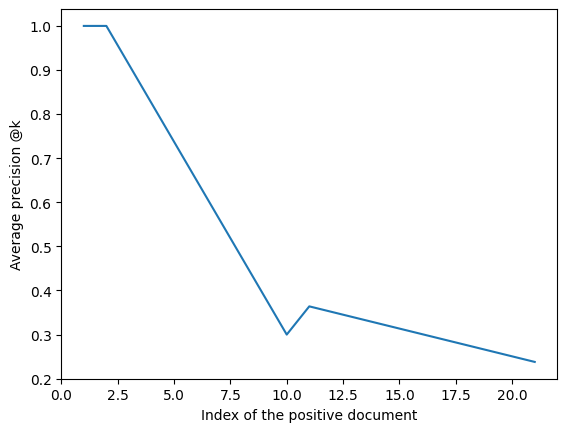

Query: ===========  Waffen Systeme  ============


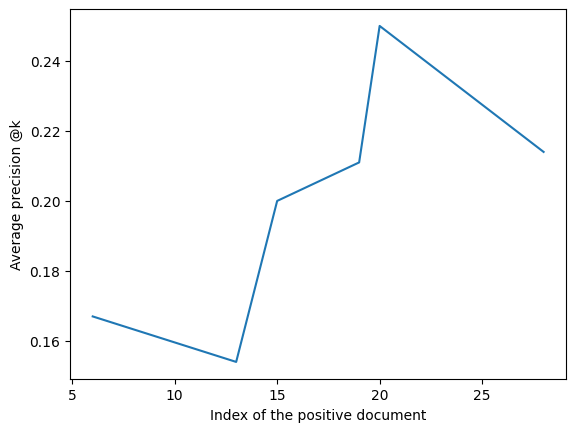

Query: ===========  Wellenformen und -ausbreitung  ============


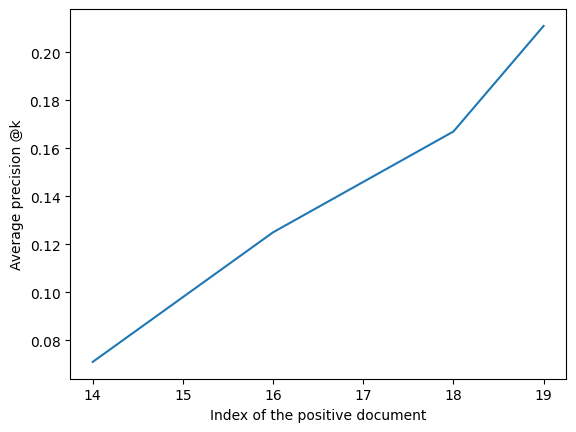

In [64]:
for prec in avg_precision_data:
    
    x = []
    y = []
    query = None
    
    for key, value in prec.items():
        if key != 'query':
            x.append(int(key))
            y.append(value)
        else:
            query = value
            
    if len(x) > 1:
        print(f'Query: ===========  {query}  ============')
        plt.ylabel('Average precision @k')
        plt.xlabel('Index of the positive document')
        sns.lineplot(x=x, y=y)
        plt.show()

In [154]:
def get_normal_distributed_ranking(pos_cnt, total_doc_cnt):
    
    half_cnt = int(total_doc_cnt / pos_cnt)
    split_rem = pos_cnt % 2
    split_itr_cnt = int(pos_cnt/2)

    sample_distribution = [0] * total_doc_cnt
    low_idx = 0
    high_idx = total_doc_cnt - 1
    mid_idx = int(total_doc_cnt/2)

    if split_rem > 0:
        sample_distribution[mid_idx] = 1

    if pos_cnt > 1:
            
        for idx in range(split_itr_cnt):

            idx_1 = low_idx + half_cnt
            idx_2 = high_idx - half_cnt

            if idx_1 == idx_2 or (idx_2 < idx_1 and pos_cnt == 2):
                idx_1 -= int(half_cnt/2)
                idx_2 += int(half_cnt/2)
            
            sample_distribution[idx_1] = 1
            sample_distribution[idx_2] = 1
                
            low_idx = idx_1
            high_idx = idx_2
            
    return sum(sample_distribution), sample_distribution

In [158]:
for rng in range(1, 23):
    
    print(get_normal_distributed_ranking(pos_cnt=rng, total_doc_cnt=25))
#     print()

(1, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(2, [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
(3, [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])
(4, [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])
(5, [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
(6, [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])
(7, [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])
(8, [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])
(9, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])
(10, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])
(11, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])
(12, [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])
(13, [0, 1, 1, 1, 1, 1, 1

In [93]:
def get_mid_val(low, mid, high, pos_sample_cnt, half_cnt):
    
    if pos_sample_cnt != half_cnt:

        mid_1 = int((low+mid)/2)
        mid_2 = int((mid+high)/2)

        print(mid_1)
        print(mid_2)

        sample_distribution[mid_1] = 1
        sample_distribution[mid_2] = 1

        pos_sample_cnt += 2
        
        get_mid_val(mid, mid, mid_1, pos_sample_cnt, half_cnt)
        get_mid_val(mid_2, mid, mid_2, pos_sample_cnt, half_cnt)

In [106]:
get_normal_distributed_ranking()

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

In [103]:
sum(sample_distribution)

5

In [104]:
sample_distribution

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

In [43]:
plt.figure(figsize=(12,5)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
)
plt.ylabel('No. of documents retrieved')
plt.xlabel('Threshold multiplier range')

for idx in range(1, len(threshold_doc_df.columns.tolist())):    
    sns.lineplot(data=threshold_doc_df, x="Threshold multiplier", y=f"Query {idx}")

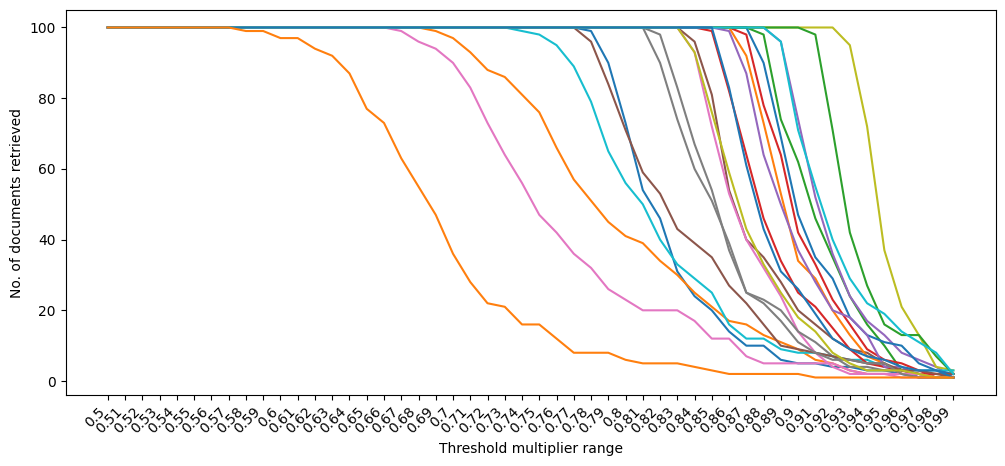

In [51]:
plt.figure(figsize=(12,5)) 
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
)
plt.ylabel('No. of documents retrieved')
plt.xlabel('Threshold multiplier range')

for idx in range(1, len(threshold_doc_df.columns.tolist())):    
    sns.lineplot(data=threshold_doc_df, x="Threshold multiplier", y=f"Query {idx}")